In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import csv
from collections import OrderedDict

In [2]:
data = pd.read_csv('data/covid_numbers.csv')

In [3]:
#check if there is unwanterd columns ?
print(data.columns)
inp = input("is there any unwanted coumns ? (y/n)")
if inp == 'y':
    check = input('Is it Unnamed: 0 ?  (y/n)')
    if check == 'y':
        del data['Unnamed: 0']
        print('deleted')
    else :
        column_name =  input("Enter column name :")
        print('deleted')
        del data[column_name]
data.to_csv('data/covid_numbers.csv', index = True)

Index(['Unnamed: 0', 'date', 'covid_cases', 'contact_cases',
       'patients_relieved', 'unknown_sources', 'Total_Active_Cases',
       'Death_rate'],
      dtype='object')
is there any unwanted coumns ? (y/n)y
Is it Unnamed: 0 ?  (y/n)y
deleted


In [4]:
data

,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,04/08/2020,1083,902.0,1021,71.0,11543,3
1,05/08/2020,1195,971.0,1234,79.0,11495,7
2,06/08/2020,1298,1017.0,800,76.0,11986,3
3,07/08/2020,1251,1061.0,814,73.0,12414,5
4,08/08/2020,1420,1216.0,1715,92.0,12112,4
...,...,...,...,...,...,...,...
59,06/10/2020,7871,6910.0,4981,640.0,87745,25
60,07/10/2020,10606,9542.0,6161,741.0,92168,22
61,08/10/2020,5445,4616.0,7003,502.0,90586,24
62,09/10/2020,9250,8215.0,8048,757.0,91763,25


In [5]:
sample = data
continue_ = 'n'
continue_ = input("Do you have to update the data  : (y/n)")
while(continue_ =='y'):
    print(" Options !!")
    print("\tAdd Column : c \n\tAdd row values : r")
    op = input("Enter your option")
    if op == 'c' :
        print("-------------------")
        print("Adding column")
        print("-------------------")
        column_name = input("Enter Column name : ")
        column_length = len(sample)
        print("Enter your entries {0} :".format("must be length of  "),len(sample))
        column = []
        for i in range(column_length):
            value = input()
            column.append(value)
        sample[column_name] = np.array(column)
        print(sample)
        save = input("Do you want to save changes (y/n): ")
        if save == 'y' : 
            data = sample
        continue_ = input("do you want to add more : (y/n)")
    if op == 'r' :
        print("-------------------")
        print("Adding row values")
        print("-------------------")
        row = {}
        d=[]
        i=0
        for key in sample.columns:
            if i==0 :
                value = input("Enter {0}".format(key))
            else :
                value = int(input("Enter {0}".format(key)))
            row.update({key:value})
            i = i+1
        d.append(row)    
        sample = sample.append(d,True)
        print(sample)
        save = input("Do you want to save these changes (y/n): ")
        if save == 'y' : 
            data = sample
            print(data)
        continue_ = input("do you want to add more : (y/n)")
        
print("Final : ")
print(data)
final_save = input("Do you want to overwrite covid_numbers.csv : (y/n) ")
if final_save == 'y':
    data.to_csv('data/covid_numbers.csv', index = True)
    print("Successully saved data")
        
        
        
            
        
        
            
            
            

        
        

Do you have to update the data  : (y/n)y
 Options !!
	Add Column : c 
	Add row values : r
Enter your optionr
-------------------
Adding row values
-------------------
Enter date11/10/2020
Enter covid_cases9347
Enter contact_cases8216
Enter patients_relieved8924
Enter unknown_sources821
Enter Total_Active_Cases96320
Enter Death_rate25
           date  covid_cases  contact_cases  patients_relieved  \
0    04/08/2020         1083          902.0               1021   
1    05/08/2020         1195          971.0               1234   
2    06/08/2020         1298         1017.0                800   
3    07/08/2020         1251         1061.0                814   
4    08/08/2020         1420         1216.0               1715   
..          ...          ...            ...                ...   
60  07/10/2020         10606         9542.0               6161   
61   08/10/2020         5445         4616.0               7003   
62   09/10/2020         9250         8215.0               8048   
63  

Successully saved data


In [6]:
data


,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,04/08/2020,1083,902.0,1021,71.0,11543,3
1,05/08/2020,1195,971.0,1234,79.0,11495,7
2,06/08/2020,1298,1017.0,800,76.0,11986,3
3,07/08/2020,1251,1061.0,814,73.0,12414,5
4,08/08/2020,1420,1216.0,1715,92.0,12112,4
...,...,...,...,...,...,...,...
61,08/10/2020,5445,4616.0,7003,502.0,90586,24
62,09/10/2020,9250,8215.0,8048,757.0,91763,25
63,10/10/2020,11755,10471.0,7570,952.0,95925,23
64,11/10/2020,9347,8216.0,8924,821.0,96320,25


In [7]:
fieldnames = ('', 'date', 'covid_cases', 'contact_cases', 'patients_relieved',
       'unknown_sources', 'Total_Active_Cases', 'Death_rate')

entries = []
#the with statement is better since it handles closing your file properly after usage.
with open('data/covid_numbers.csv', 'r') as csvfile:
    #python's standard dict is not guaranteeing any order, 
    #but if you write into an OrderedDict, order of write operations will be kept in output.
    reader = csv.DictReader(csvfile, fieldnames)
    for row in reader:
        entry = OrderedDict()
        for field in fieldnames:
            entry[field] = row[field]
        entries.append(entry)

output = {
    "Data": entries
}

with open('data/covid_numbers.json', 'w') as jsonfile:
    json.dump(output, jsonfile)
    jsonfile.write('\n')

In [8]:
data

,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,04/08/2020,1083,902.0,1021,71.0,11543,3
1,05/08/2020,1195,971.0,1234,79.0,11495,7
2,06/08/2020,1298,1017.0,800,76.0,11986,3
3,07/08/2020,1251,1061.0,814,73.0,12414,5
4,08/08/2020,1420,1216.0,1715,92.0,12112,4
...,...,...,...,...,...,...,...
61,08/10/2020,5445,4616.0,7003,502.0,90586,24
62,09/10/2020,9250,8215.0,8048,757.0,91763,25
63,10/10/2020,11755,10471.0,7570,952.0,95925,23
64,11/10/2020,9347,8216.0,8924,821.0,96320,25


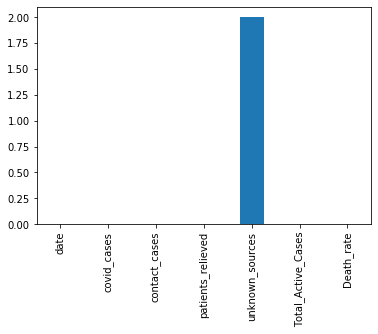

In [9]:
data.isna().sum().plot(kind='bar')


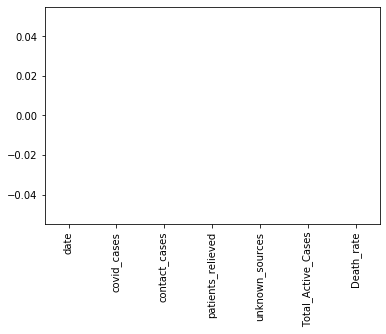

In [10]:
data['unknown_sources'].fillna(data['unknown_sources'].mean(),inplace=True)
data.isna().sum().plot(kind='bar')

In [11]:
data

,date,covid_cases,contact_cases,patients_relieved,unknown_sources,Total_Active_Cases,Death_rate
0,04/08/2020,1083,902.0,1021,71.0,11543,3
1,05/08/2020,1195,971.0,1234,79.0,11495,7
2,06/08/2020,1298,1017.0,800,76.0,11986,3
3,07/08/2020,1251,1061.0,814,73.0,12414,5
4,08/08/2020,1420,1216.0,1715,92.0,12112,4
...,...,...,...,...,...,...,...
61,08/10/2020,5445,4616.0,7003,502.0,90586,24
62,09/10/2020,9250,8215.0,8048,757.0,91763,25
63,10/10/2020,11755,10471.0,7570,952.0,95925,23
64,11/10/2020,9347,8216.0,8924,821.0,96320,25


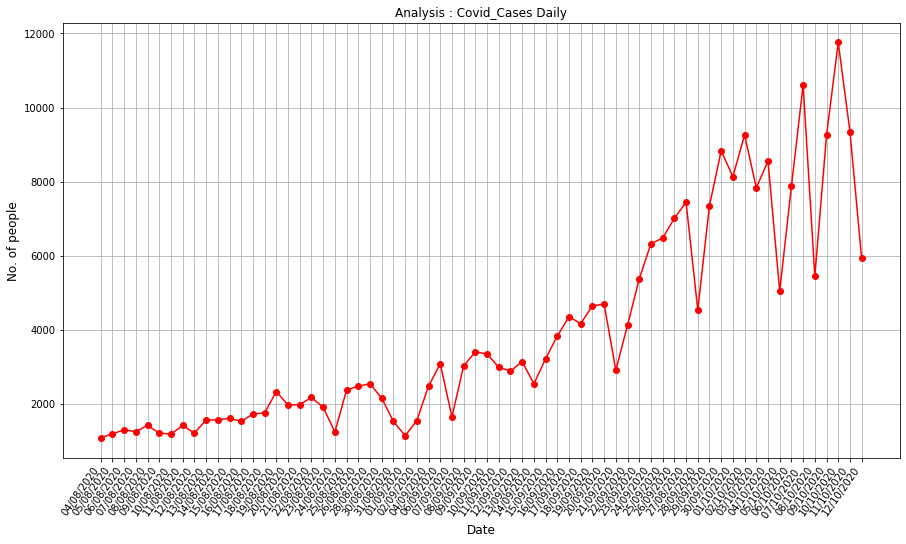

In [12]:
from matplotlib import cbook
fig_curve = plt.figure(figsize=(15,8))
#plt.imshow(image)
plt.plot(data['date'],data['covid_cases'],color='red',marker='o')
plt.xticks(rotation=55,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Covid_Cases Daily')
plt.grid(True)
plt.show()

In [13]:
fig_curve.savefig('reports/Daily_Cases.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

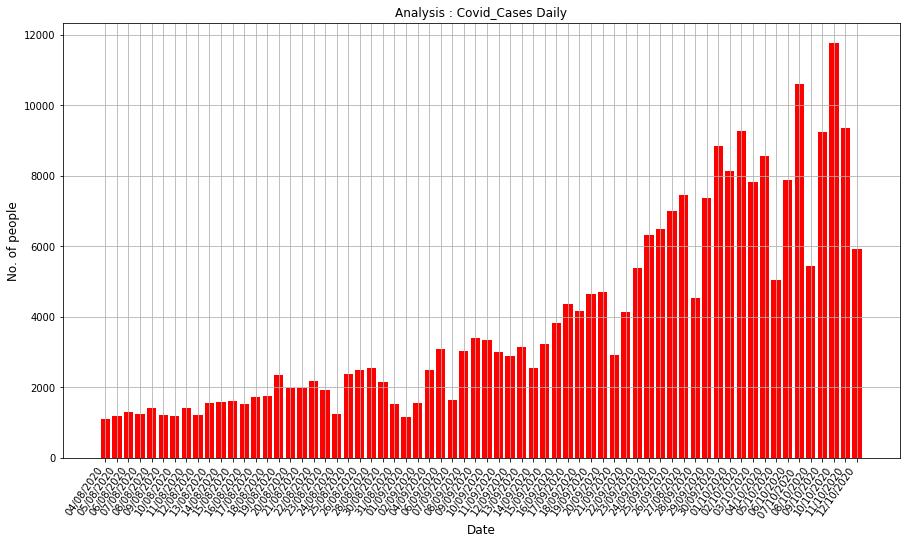

In [14]:
from matplotlib import cbook
fig_plot = plt.figure(figsize=(15,8))
plt.bar(data['date'],data['covid_cases'],color='red')
plt.xticks(rotation=55,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Covid_Cases Daily')
plt.grid(True)
plt.show()

In [15]:
fig_plot.savefig('reports/Daily_Cases_bar.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

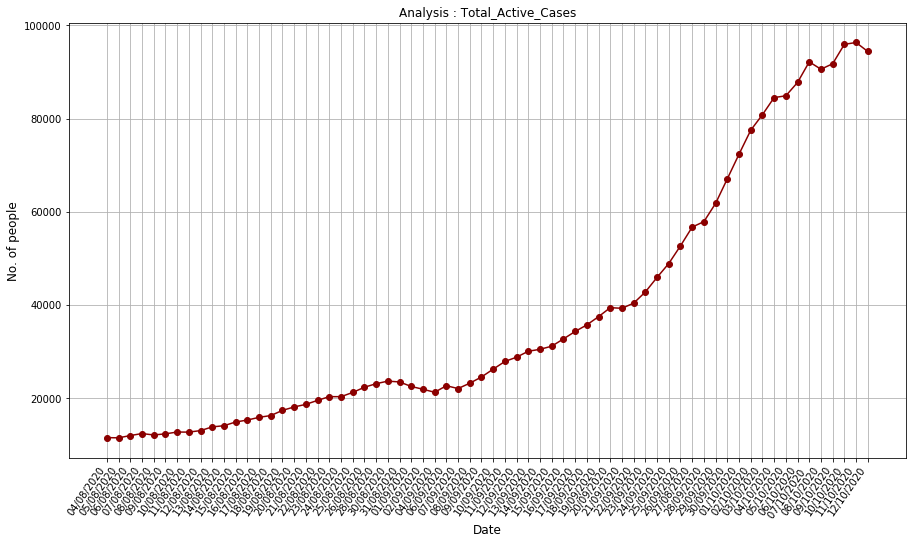

In [16]:

fig2 = plt.figure(figsize=(15,8))
plt.plot(data['date'],data['Total_Active_Cases'],color='darkred',marker='o')
plt.xticks(rotation=55,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title('Analysis : Total_Active_Cases')
plt.grid(True)
plt.show()

In [17]:
fig2.savefig('reports/TotalActiveCases.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

<Figure size 1800x864 with 0 Axes>

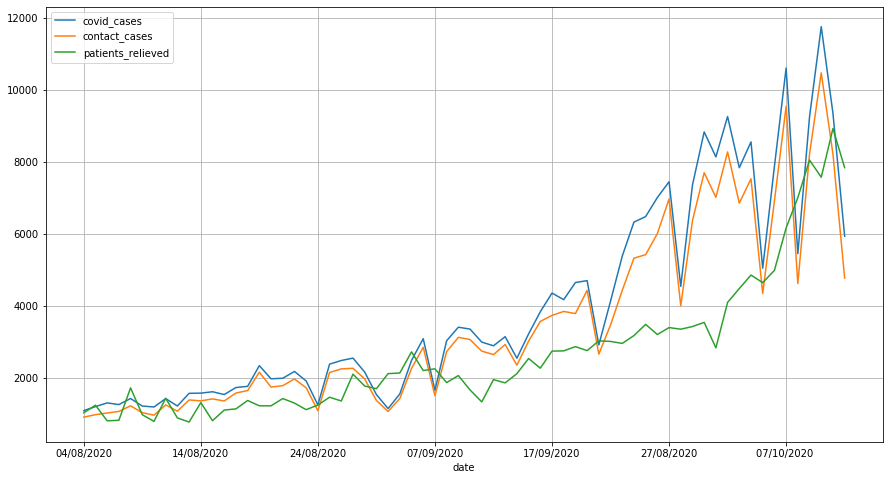

In [18]:
figov = plt.figure(figsize=(25,12))
plot_data = data.iloc[:,[0,1,2,3]]
plot_data.set_index('date').plot(figsize=(15,8), grid=True)
#plt.show()
#plt.savefig('reports/Overall.png')

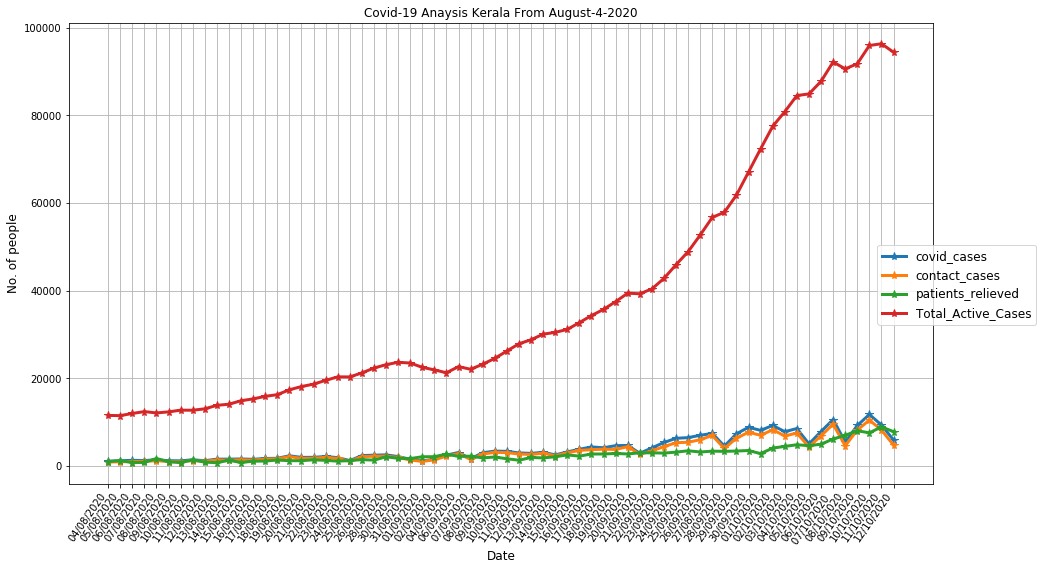

In [19]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data[['covid_cases','contact_cases','patients_relieved','Total_Active_Cases']],'-*',linewidth=3, markersize=8)
plt.xticks(rotation=55,ha='right')
plt.title('Covid-19 Anaysis Kerala From August-4-2020')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.grid(True)
plt.figlegend(labels=('covid_cases','contact_cases','patients_relieved','Total_Active_Cases'),loc='center right',fontsize='large')
fig.savefig('reports/Overall.png')

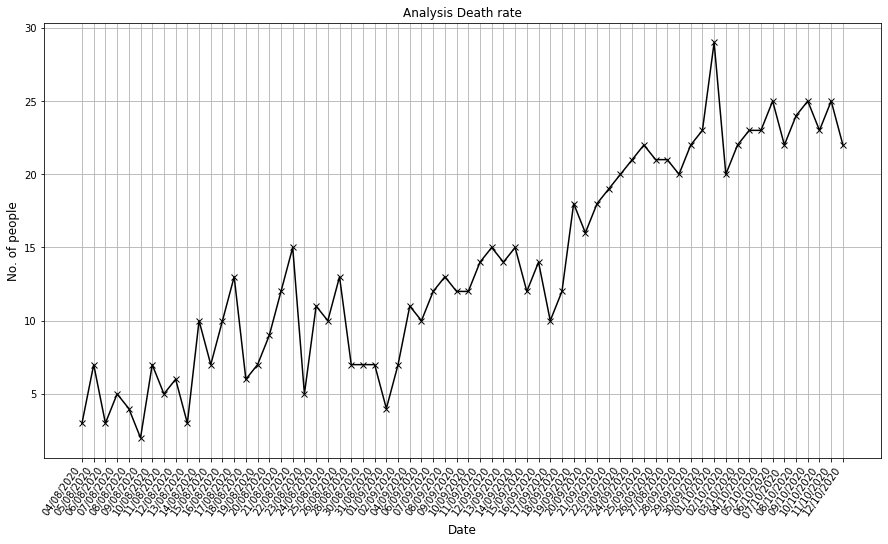

In [20]:
fig3 = plt.figure(figsize=(15,8))
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.plot(data['date'],data['Death_rate'],color='black',marker='x')
plt.title('Analysis Death rate')
plt.xticks(rotation=55,ha='right')
plt.grid(True)
plt.show()

In [21]:
fig3.savefig('reports/Death_rate.png',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

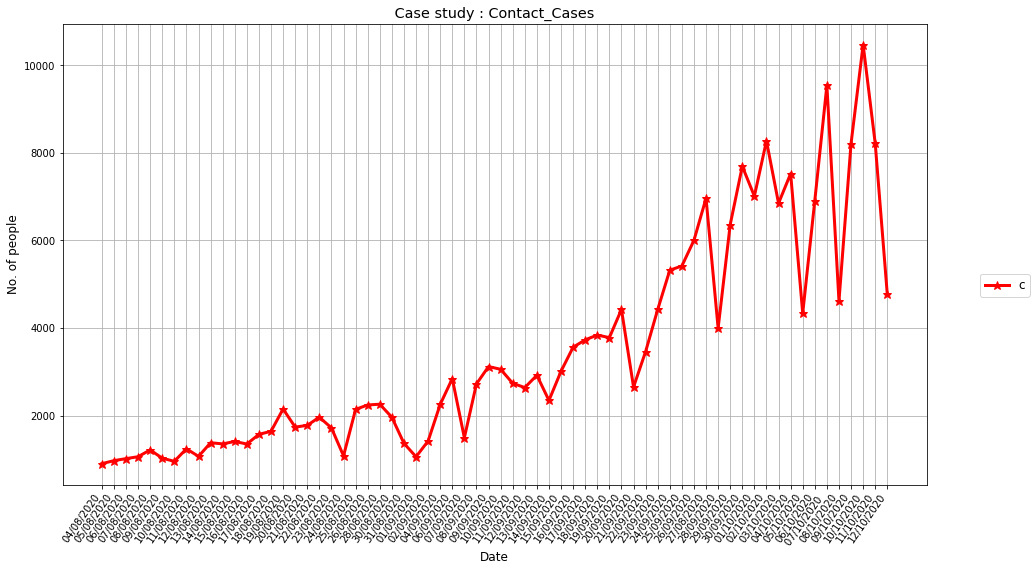

In [22]:
fig_contact = plt.figure(figsize=(15,8))
axes = fig_contact.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data['contact_cases'],'-r*',linewidth=3, markersize=9)
plt.xticks(rotation=55,ha='right')
plt.xlabel('Date',fontsize='large')
plt.ylabel('No. of people',fontsize='large')
plt.title(' Case study : Contact_Cases ',fontsize='x-large')
plt.grid(True)
plt.figlegend(labels=('contact_cases'),loc='center right',fontsize='large')
fig_contact.savefig('reports/Contact_Cases.png')

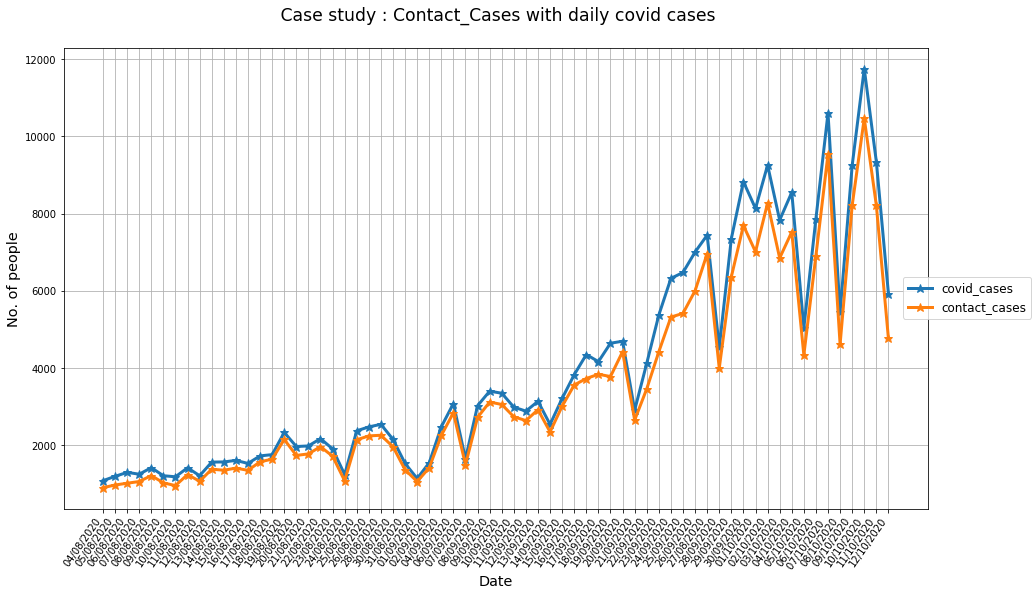

In [23]:

fig_contact2 = plt.figure(figsize=(15,8))
axes = fig_contact2.add_axes([0.1,0.1,0.8,0.8])
axes.plot(data['date'],data[['covid_cases','contact_cases']],'-*',linewidth=3, markersize=9)
plt.xticks(rotation=55,ha='right')
plt.xlabel('Date',fontsize='x-large')
plt.ylabel('No. of people',fontsize='x-large')
plt.title(' Case study : Contact_Cases with daily covid cases\n ',fontsize='xx-large')
plt.grid(True)
plt.figlegend(labels=('covid_cases','contact_cases'),loc='center right',fontsize='large')
fig_contact2.savefig('reports/Contact_Cases_wrt_covidcases.png')

In [24]:
# sample = data.dropna()
# l1 = sample['Total_Active_Cases']
# l2 = sample['contact_cases']
# l3 = sample['unknown_sources']
# l4 = sample['patients_relieved']

In [33]:
# list1 = np.array([l2,l3,l4])
# sample.columns